## Twitter Analysis of gun control sentiments in Chicago


I will be using twitter to better understand sentiments involving gun contol in the Chicago area

By Ainsleigh Douglas

First we will bring in all the libraries that will allow us to process and plot geo spatial data

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt

Tweepy is the library to bring in twitter data using python, this library needs authentication such as a twitter develoepr account.

In [4]:
import tweepy as tw

Textblob is a library for text analysis, used for cleaning up tweets and sentiment analysis

In [5]:
from textblob import TextBlob
import re

This library called wordcloud will allow us to create word clouds

In [6]:
from wordcloud import WordCloud, STOPWORDS

Now we will upload our personal twitter keys inorder to access the API provided by twitter

In [7]:
consumer_key= 'IdnKva5I3b3dwLngiiwZPvfZV'
consumer_secret= 'I0kfwHZnesGOnm5x41ADgqqrFhlR4qPlcadVPDfzgM1LVzCg6h'
access_token= '1362449105348304900-dWgBoUlT0XfdnuQ0SWdfYTNGmlFfsi'
access_token_secret= '7mnMhZDffYkVswKMzdxdSSPqxX8wusNDYAlOOdNUPTxbA'

Next I will authenticate myself

In [8]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Defining my search criteria

Now I will specific my research and clean the tweets I find accordingly. The search term I will use is "gun control" inorder to understand the overall twitter sentiments related to gun restrictions in the city of Chicago.

In [9]:
searchterm = 'gun control'

Now I will filter out the retweets and cap the number of tweets at 500 because there is a limit to how many tweets you can process at a time.

In [10]:
q = searchterm + " -filter:retweets"
max_tweets = 500

Next I will run a query for full length tweets that will max at 500 based on my key phrase "gun control"

In [11]:
tweets = tw.Cursor(api.search,
                   q=q, 
                   tweet_mode='extended').items(max_tweets)

Now I will run a loop to print 500 tweets referencing my search phrase.

In [12]:
for index, tweet in enumerate(tweets):
    print(index, tweet.full_text)

0 @11thHour @PhilipRucker Well I guess while Congress was doing NOTHING about assault rifles and any other sort of other gun control, 74 million nuts were building an army. Thanks, elected officials!!!
1 @Polygon They should first introduce gun control
2 https://t.co/yMmHuf7t5p
3 i hope someone buys me gun stuff for my birthday before these neoliberals wanna decide the fate of the 2022 and 2024 election by passing gun control. it’s almost as if they want the GOP to win
4 @mehdirhasan We don't need Senate action on gun control, thanks.
5 @LynnSharig8 https://t.co/GZXfOyfNxr
6 Biden considers regulating ‘ghost guns,’ other executive actions to curb gun violence https://t.co/tuFIOe8A8V via @Yahoo ZERO = number of "ghost guns" used to murder.  It's not about safety; it's about control - don't ever forget it.  Just say "NO!" to any further gun control.
7 @GemSpoiledLefty @norcalbooknerd no i as a non-american also think that leftists liking guns is very specific to the US

(i dunno if that'

Now I will refine my collection even further to a geo location and my defined phrase. In this case I will use the longitude and lattitude of the center of downtown Chicago and include everything within 50 km.

In [13]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='41.789722,-87.599724,50km', 
                   tweet_mode='extended').items(max_tweets)

Once again I will run the loop to print the results of the query

In [14]:
for index, tweet in enumerate(tweets):
    print(str(tweet.created_at) + ': ' + tweet.full_text)

2021-02-24 03:14:20: anything but gun control. https://t.co/TpTzFoZKkP
2021-02-24 00:45:08: After being shot multiple times in the head and face, Chicago police say the woman was able to gain control of the gun and shoot the man in the leg.​  https://t.co/fOEgGqHHEv
2021-02-23 21:42:46: @RealCandaceO Common sense only applies to useless "common sense gun control" that no criminals would follow
2021-02-23 19:48:59: Biden Gun Control Plan Would ‘Criminalize’ up to 105 Million People: Of course he’s surrounded by armed protectors.  What the hell does he care about the rest of us?!                             Gun-rights Group

https://t.co/dQH4X5SsRQ
2021-02-23 15:22:08: here we go:
Gun control at all govt buildings and polling places--proposes American Bar Assoc.
#2A #guns 
@USRoute41 
https://t.co/c2Ezu1Ff7Q
2021-02-23 15:00:00: Instead of pushing flawed gun control schemes like banning modern sporting rifles, we should continue providing resources to programs with a proven record of mak

### Organizing the data

Since the tw.Cursor function can only run a single loop we have to run the search again

In [15]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='41.789722,-87.599724,50km', 
                   tweet_mode='extended').items(max_tweets)

I will print the tweets in a geo json data frame to make the data more clearly formatted

In [16]:
print(tweets)

In [17]:
json_data = [tweet._json for tweet in tweets]

In [18]:
df = pd.json_normalize(json_data)
df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.favorited,quoted_status.retweeted,quoted_status.possibly_sensitive,quoted_status.lang,place,user.entities.url.urls,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,entities.media,extended_entities.media
0,Wed Feb 24 03:14:20 +0000 2021,1364413322368602112,1364413322368602112,anything but gun control. https://t.co/TpTzFoZKkP,False,"[0, 25]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Feb 24 00:45:08 +0000 2021,1364375776892772354,1364375776892772354,After being shot multiple times in the head an...,False,"[0, 174]","<a href=""https://trueanthem.com/"" rel=""nofollo...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'url': 'http://t.co/q4scpU7ZK4', 'expanded_u...",NaN,NaN,NaN,NaN
2,Tue Feb 23 21:42:46 +0000 2021,1364329880691875840,1364329880691875840,@RealCandaceO Common sense only applies to use...,False,"[14, 108]","<a href=""http://twitter.com/download/android"" ...",1.364292e+18,1364292024321597440,8.782476e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tue Feb 23 19:48:59 +0000 2021,1364301248107839493,1364301248107839493,Biden Gun Control Plan Would ‘Criminalize’ up ...,False,"[0, 236]","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tue Feb 23 15:22:08 +0000 2021,1364234093404303365,1364234093404303365,here we go:\nGun control at all govt buildings...,False,"[0, 141]","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'url': 'http://t.co/yg303Z2FdU', 'expanded_u...",NaN,NaN,NaN,NaN


Lets take a look at thee fields, we can see that twitter collects all kind of data but we need to narrow that down further

In [19]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 162 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   created_at                                             83 non-null     object 
 1   id                                                     83 non-null     int64  
 2   id_str                                                 83 non-null     object 
 3   full_text                                              83 non-null     object 
 4   truncated                                              83 non-null     bool   
 5   display_text_range                                     83 non-null     object 
 6   source                                                 83 non-null     object 
 7   in_reply_to_status_id                                  55 non-null     float64
 8   in_reply_to_status_id_str                          

We will narrow down what columns we need then we will rename them accordingly

In [20]:
df = df[['created_at','full_text','user.screen_name','user.profile_image_url_https']]
df.columns = ['created_at','text','screen_name','profile_image']

Now we will look at a set of 5 tweets in their entirety to see if the data frame updated accordingly

In [21]:
pd.set_option('display.max_colwidth', None)
df.sample(5)

,created_at,text,screen_name,profile_image
58,Wed Feb 17 15:16:48 +0000 2021,@BrandyMcgillTV @WLOX let’s kit out every classroom with 26 bunker desks before any modicum of meaningful gun control,CF_realidad,https://pbs.twimg.com/profile_images/1353444604436221953/HO_K8RTw_normal.jpg
19,Sun Feb 21 14:55:51 +0000 2021,@ksorbs I'm tired of the right crying about gun control and free speech without restraints we would be a chaotic nation also the left talk to defund the police the right don't want to we can argue this all day but no one we can't even agree on the underlying problem with,8153024043,https://pbs.twimg.com/profile_images/453997836015648768/8DopXGiY_normal.jpeg
67,Tue Feb 16 23:23:44 +0000 2021,Any common-sense gun control policy must include ammo control as well. It doesn't make sense to make it any easier to buy the part that inflicts the wound than to buy the rest of the package.,whomstbastank,https://pbs.twimg.com/profile_images/1363682148402757640/992fJQjI_normal.png
50,Thu Feb 18 03:27:00 +0000 2021,@nbcchicago How much was spent on gun control or the war on illicit drugs?,PaulMiller1313,https://pbs.twimg.com/profile_images/1049062201166684160/zMAtS1Eh_normal.jpg
44,Thu Feb 18 19:12:08 +0000 2021,"@summeranne Ok, we'll teach you how to be homeless and not die in the winter, and you help us get national gun control so fewer of us get shot. Deal?\nSincerely \n -Chicago",MurphyRow,https://pbs.twimg.com/profile_images/481313799849271296/Uo63Bk-I_normal.jpeg


### Word Cloud
We now need to clean the data to filter out unimportant words to make a more valuable word cloud.

We will start with cleaning the tweets to only include regular expressions (no emojis, symbols or URLS)

In [22]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

Now I will create a column for the clean tweets inorder to analyze only cleaned tweets and then I will apply a loop inorder to clean every tweet.

In [23]:
df['clean_text'] = ''
for i, row in df.iterrows():
    clean = clean_tweet(row.text)
    df.at[i,'clean_text'] = clean

Now i will put every cleaned tweet into a data field that can processed into a word cloud

In [24]:
all_text = ' '.join(df['clean_text'])
all_text

'anything but gun control After being shot multiple times in the head and face Chicago police say the woman was able to gain control of the gun and shoot the man in the leg Common sense only applies to useless common sense gun control that no criminals would follow Biden Gun Control Plan Would Criminalize up to 105 Million People Of course hes surrounded by armed protectors What the hell does he care about the rest of us Gunrights Group here we goGun control at all govt buildings and polling placesproposes American Bar Assoc2A guns Instead of pushing flawed gun control schemes like banning modern sporting rifles we should continue providing resources to programs with a proven record of making safer communities senior VP and general counsel Lawrence Keane writes Garland says DOJ would advance Bidens progun controlpolicies MSCHF mounted a remotecontrol paintball gun to Spot U cant count Chicago we already have all yall fucking gun control and yet still failed Human trafficking is a serio

now i will use STOPWORDS from the library inorder to remove commonly used/unessassary words as well as the search term.

In [27]:
stop_words = ['gun'] + ['control'] + list(STOPWORDS)

Now i will display and create a word cloud using the field from above and removing the stop words inlcuded in the library

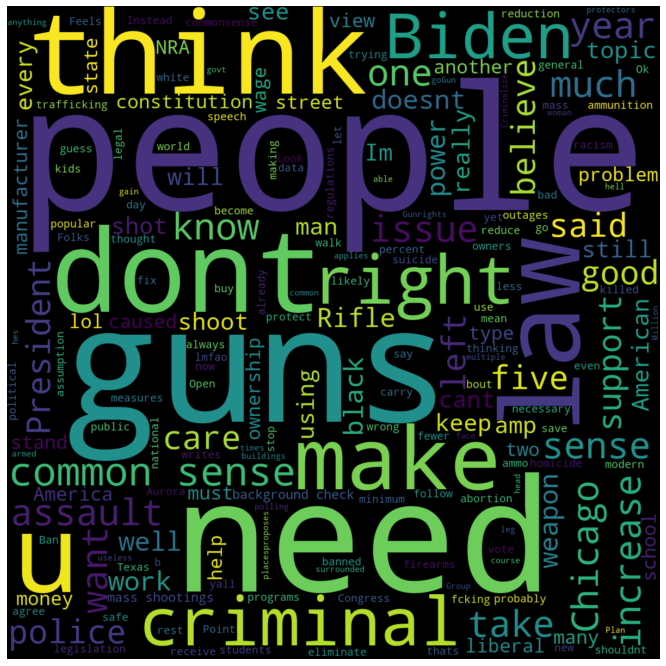

In [63]:
wordcloud = WordCloud(width=1200, 
                      height=1200,
                      background_color="black",
                      stopwords=stop_words).generate(all_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

I think the main thing I can pull from this word cloud is the fact the gun control, gun laws, and gun incidents will always result back to the peoples use of guns and the fact the someones constitutional "rights" is the most debated thing on twitter.

### Sentiment Analysis

I will now analyze twitter users positive and negative sentiments towards the term "gun control"

I will go through the process of basing tweets on wether fall into one of five categories: very negative, negative, neutral, positive and very positive. I will sample a random tweet, analyze it using the textblob library and then analyze the numerical result.

In [29]:
tweet = df.sample().clean_text.values[0]
print(tweet)

a = TextBlob(tweet)

a.sentiment

Biden Gun Control Plan Would Criminalize up to 105 Million People Of course hes surrounded by armed protectors What the hell does he care about the rest of us Gunrights Group


Sentiment(polarity=0.0, subjectivity=0.0)

I will add a column on the data frame to contain the polarity, or numerical value of the sentiments.

In [46]:
df['polarity']=''

Then I will use a loop to filter each tweet assigning them polarity to the newly created column in the data frame.

In [47]:
for i, row in df.iterrows():
    a = TextBlob(row.clean_text)
    df.at[i,'polarity'] = a.polarity

Looking at this sample we can see the new column is working effectively 

In [48]:
df[['clean_text','polarity']].sample(5)

,clean_text,polarity
10,He said good and bad people in both parties he never mentioned Trump I think he was referring to political issues like gun control immigration etcthings that there can be a middle ground on not criminal acts,0.04
6,Garland says DOJ would advance Bidens progun controlpolicies,0
51,Bet theyd be down 200 next year if everyone in this city had their needs met Also increase in gun control means increase in criminalization of black and brown people Not hypothetical we can already see what the liberal reform effort has bought for US prison populations,-0.107407
31,I know it stands for the manufacturer and I still want gun control,0
81,Two years ago yesterday was when a man who shouldnt legally have had a gun shot and killed five people in suburban Aurora It prompted calls to Fix the FOIDA gun law status check Also Sunday marked 13 years since five students were killed at NIU,-0.02


These numerical conditions will now be associated with the values that are readable. -0.2 being the most negative, 0 being neutral and 0.2 being the most positive. Then i will make another column to hold the word based values.

In [50]:
conditions = [
    (df['polarity'] < -0.2), # very negative
    (df['polarity'] < 0) & (df['polarity'] >= -0.2),   # negative
    (df['polarity'] == 0),  # neutral
    (df['polarity'] > 0) & (df['polarity'] <= 0.2),    # positive
    (df['polarity'] > 0.2)  # very positive
    ]

values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

df['sentiment'] = np.select(conditions, values)

In [51]:
df.sample(50)[['clean_text','polarity','sentiment']]

,clean_text,polarity,sentiment
78,gun control decreases homicide and suicide cope,0,neutral
45,Kelly has some liberal views given his understandable views on gun control I would not necessarily consider him a moderate Democrat,0,neutral
80,Psaki Gun control a priority Biden not afraid of standing up to theNRA,0.3,very positive
65,Gun control doesnt work Look at Chicago,0,neutral
79,Were not trying to penalize responsible gun owners Were trying to solve the problem that exists today which led to another mass tragedy in Aurora Villivalam said,0.2,positive
55,Feels like gun control is really a centrist issue the further you move in either direction the less popular it becomes the drop in support is faster on the right tho,0.18381,positive
19,Im tired of the right crying about gun control and free speech without restraints we would be a chaotic nation also the left talk to defund the police the right dont want to we can argue this all day but no one we cant even agree on the underlying problem with,0.0619048,positive
53,The Green New Deal didnt cause Texas power outages Gay marriage gun control and the black vote in Georgia Michigan Pennsylvania and Wisconsin caused Texas power outages TexasBlackout TexasWinterStorm2021 AbbottFailedTexas,0.0465909,positive
68,Man over these past few days I realized that a lot more leftwingers liked guns than I thought I thought we were pretty unified on gun control but I guess not lol,0.0833333,positive
59,I think well soon get common sense speech control regulations to go with our common sense gun control,-0.3,very negative


I will now assign 5 different colors to the bar chart that match my research topic.

In [58]:
sentiment_colors = ox.plot.get_colors(5,cmap='bone',return_hex=True)

Lastly I will create a bar chart showing the negativ ot positive sentiments of the phrase gun control.

In [57]:
# bar chart
fig = px.bar(df, 
             x='sentiment',
             width=600,
             title='Sentiment analysis for "'+ searchterm + '"',
             color='sentiment',
             category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, # use the colors selected in previous cell
            )
# fig.update_traces(textinfo='value')
fig.update_traces(marker_line_width=0) # gets rid of horizontal white lines
fig.show()

In the city of chicago the phrase "gun control" has a fairly positive leaning sentiment which it could be concluded that people are in favor of there being stronger gun control laws. The negativ leaning sentiments could mean the tweet is against gun control laws and in favor of 2nd ammendment rights or it could mean that they don't believe gun control works and think that other forces should restrict the use of guns.

I, Ainsleigh, analysed gun control sentiments on the city of Chicago, Illinois. My partner, Stacy, analyzed gun control sentiments for the city of Huston, Texas, inorder for us to compare them further down the line.